In [227]:
import matplotlib.pyplot as plt
import numpy as np
import m4_helpers
from scipy.optimize import curve_fit


In [228]:
x_dim, y_dim = 40, 20
epochs = 300
velocities = m4_helpers.m4_1(x_dim=x_dim, y_dim=y_dim, epochs=epochs, omega=0.5)

In [229]:
num_plots = 10
print_epoch = round(epochs / num_plots)
if print_epoch == 0:
    print_epoch = 1

vel_print = []
for t in range(len(velocities)):
    if t % print_epoch == print_epoch-1:
        vel_print.append((velocities[t], t))

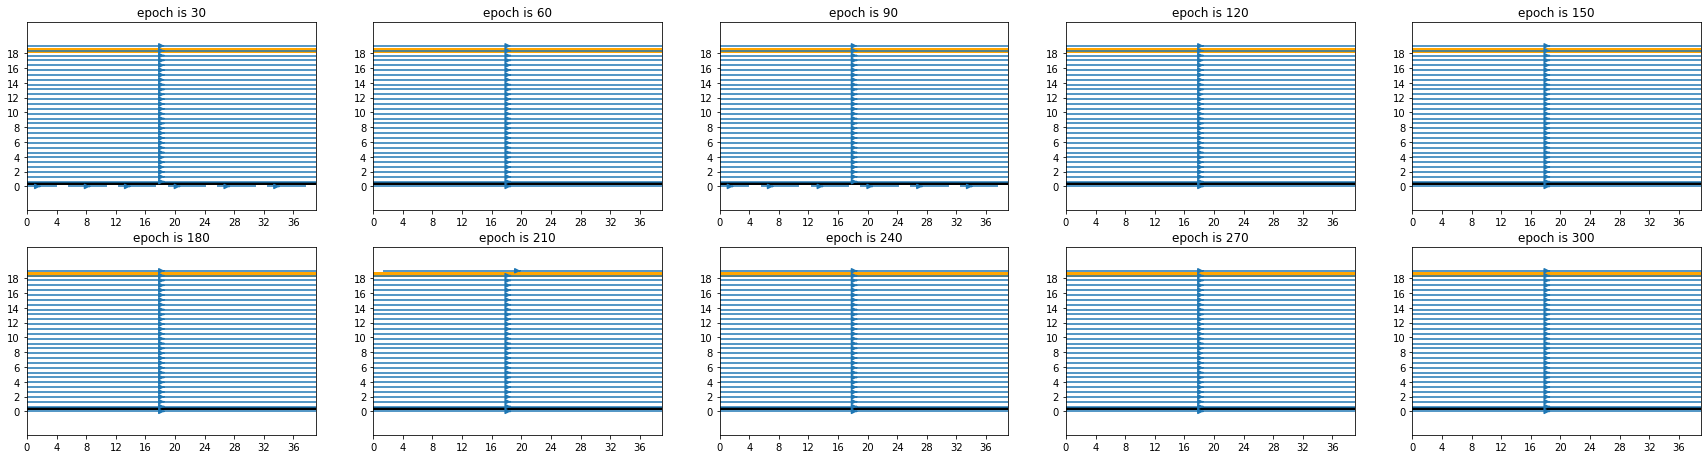

In [240]:
fig = plt.figure(figsize=(30,20))
plt.axis('off')
fig = m4_helpers.m4_1_fig(fig, x_dim=x_dim, y_dim=y_dim, velocities=vel_print)
plt.show()
plt.close()

### We know that moving top wall is working if top particles have same velocity as wall

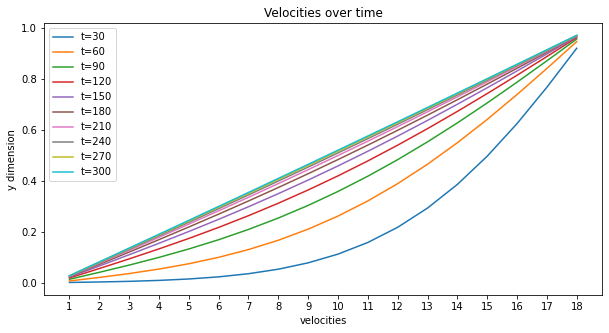

In [233]:
# Plot all velocitities along y
fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
ax.set_title("Velocities over time")
for v in vel_print:
    # print(vel_clean)
    ax.plot(np.arange(y_dim-2)+1, v[0][0,0,1:-1], label="t={}".format(v[1]+1))
ax.set_xticks(np.arange(y_dim-2)+1)
ax.set_xlabel("velocities")
ax.set_ylabel("y dimension")
ax.legend()
plt.show()
plt.close()

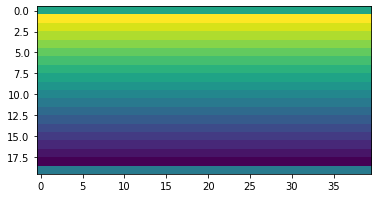

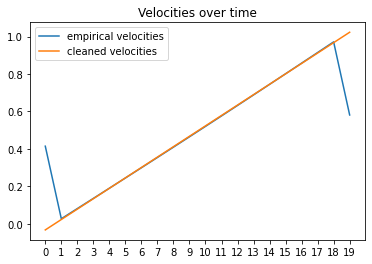

In [230]:
# plt.axis('off')
u_aij_max = vel_print[-1][0]
plt.imshow(np.rot90(vel_print[-1][0][0,:,:]))
plt.show()
plt.close()

# Walls
# Because the walls are at 0.5 and y_dim - 0.5 we have to take the values from here and plot them.
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.set_title("Velocities over time")

def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, np.arange(y_dim-2)+1, u_aij_max[0,0,1:-1])
vel_clean = popt[0]*(np.arange(y_dim) + 0.0) + popt[1]
# vel_clean = popt[0]*(np.arange(y_dim) + 0.5) + popt[1]
ax.set_xticks(np.arange(y_dim))
ax.plot(np.arange(y_dim),u_aij_max[0,0,:], label="empirical velocities")
ax.plot(np.arange(y_dim), vel_clean, label="cleaned velocities")
ax.legend()
plt.show()
plt.close()


# Walls
Because the walls are at 0.5 and y_dim - 0.5 we have to take the values from here and plot them.

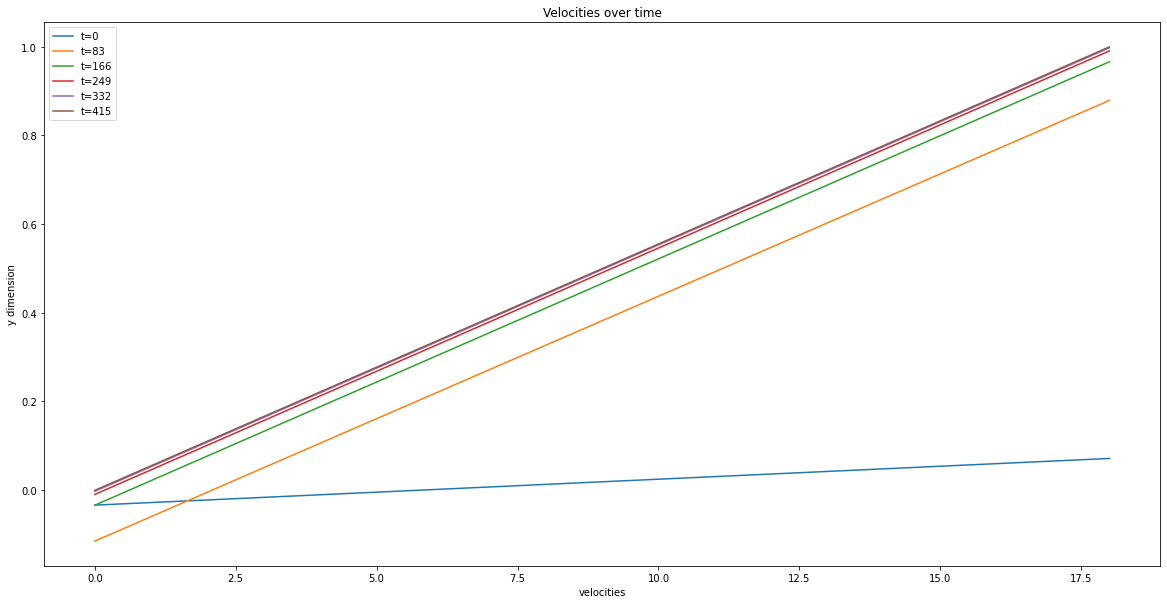

In [125]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
ax.set_title("Velocities over time")
for v in velocities[:6]:
    def func(x, a, b):
        return a * x + b
    popt, pcov = curve_fit(func, np.arange(y_dim-2)+1, v[0][0,0,1:-1])
    # print(popt[1])
    # print(popt[0])
    vel_clean = popt[0]*(np.arange(y_dim-1) + 0.5) + popt[1]
    # print(vel_clean)
    ax.plot(np.arange(20-1), vel_clean, label="t={}".format(v[1]))
ax.set_xlabel("velocities")
ax.set_ylabel("y dimension")
ax.legend()


# Reynoldsnumber
Divides the stable and unstable purturbations like turbulance.

If larger than 1 the system could show instability and turbulance.

For sliding lid in most work choose a reynoldsnumber ~1000. 

- Gives idea of what our outcome should look like.
- use 300 grid points as $R_e = 340/10 * l = 3.4 * 300 = 1000$ (theoretically derived with certrain omega)

Re is indicator that I am in the flow regime where simulation conforms to "normal" circumstances


# Diffusion constant phi

Set to 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
phi = np.zeros(100)
phi[49] = 1.
D = 1.0
dx = 1.
dt = 0.1
phi0 = phi

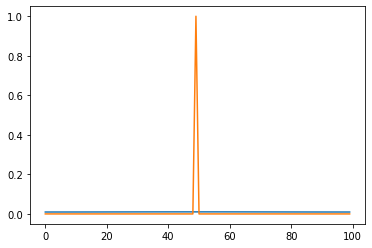

In [33]:
for i in range (10000):
    phi = phi + D*dt/dx**2*(np.roll(phi,1)-2.*phi+np.roll(phi,-1))
plt.plot(phi)
plt.plot(phi0)

Function still retains Gausian like distribution, but its super low.

15.625